In [4]:
from mfcc import *
from librosa import display
import matplotlib.pyplot as plt

/home/pcallens/miniconda3/envs/kerasenv/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/home/pcallens/miniconda3/envs/kerasenv/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit

Bad key "text.kerning_factor" on line 4 in
/home/pcallens/miniconda3/envs/kerasenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mpls

In [5]:
%cd ../hdd

/opt/hdd1/pcallens


In [71]:
m_sr

16000

In [113]:
def compute_norm_mfcc_3(signal,sr):
    signal = feature_normalize(signal)
    mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=40, hop_length=int(0.016*sr), n_fft=int(0.04*sr))
    #mfcc = librosa.util.fix_length(mfcc, size = 645, axis=1, mode='wrap') #Reshape to windom size
    mfcc = librosa.util.normalize(mfcc, axis=1)
    return mfcc

def plot_mfcc(mfcc,title):
    plt.figure(figsize=(15,10))
    librosa.display.specshow(mfcc)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Log-frequency power spectrogram' + title)

In [114]:
sr, music = wavfile.read('../../../home/pcallens/RT-estimation/RCNN/Datasets/Music/fma_all_wav_sr16000_c_1_4s/000005.wav')
rev_sr, rev_music = wavfile.read('rev_music_ao_july_2/OutbackClimbingCenter/000005.wav')

mfcc = compute_norm_mfcc_3(music,sr)
rev_mfcc = compute_norm_mfcc_3(rev_music,rev_sr)

In [115]:
print(f'revsr = {rev_sr} \nmusicsr = {sr}')

revsr = 16000 
musicsr = 16000


In [116]:
print(f'SHAPES\nmfcc = {mfcc.shape} \nrevmfcc = {rev_mfcc.shape}')

SHAPES
mfcc = (40, 251) 
revmfcc = (40, 251)


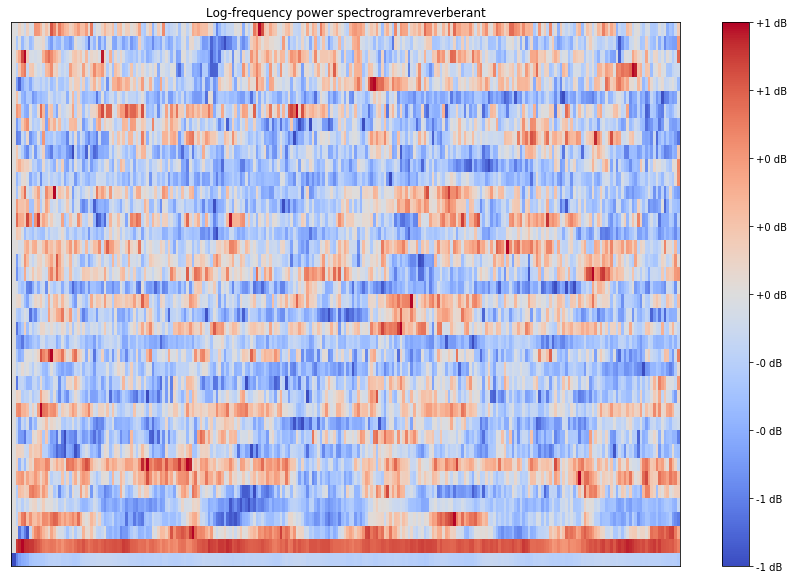

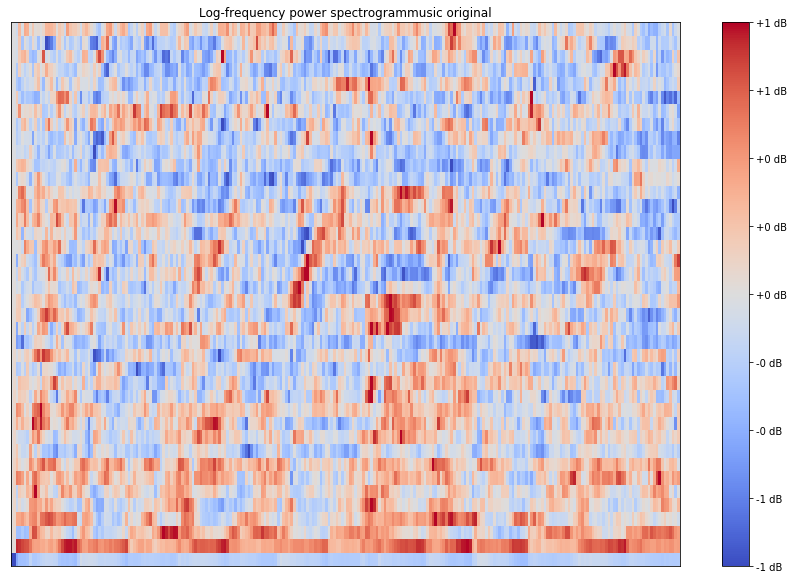

In [117]:
plot_mfcc(rev_mfcc,'reverberant')
plot_mfcc(mfcc,'music original')

In [16]:
lib_m, lib_sr = librosa.load('fma_all_wav/000540.wav')
spectrogram = librosa.feature.melspectrogram(lib_m, lib_sr)

/home/pcallens/miniconda3/envs/kerasenv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


FileNotFoundError: [Errno 2] No such file or directory: 'fma_all_wav/000540.wav'

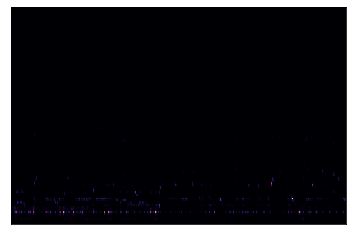

In [29]:
librosa.display.specshow(spectrogram)

In [27]:
lib_sr

22050